In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.describe([x*0.1 for x in range(10)])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
0%,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
10%,521.000000,27.000000,1.000000,0.000000,1.000000,0.00000,0.000000,20273.580000,0.000000
20%,566.000000,31.000000,2.000000,0.000000,1.000000,0.00000,0.000000,41050.736000,0.000000
30%,598.700000,33.000000,3.000000,0.000000,1.000000,1.00000,0.000000,60736.079000,0.000000
40%,627.000000,35.000000,4.000000,73080.908000,1.000000,1.00000,0.000000,80238.340000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000


In [9]:
for col in ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']:
    print(col)
    print(df[col].value_counts())
    print()

Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Gender
Male      5457
Female    4543
Name: Gender, dtype: int64

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

HasCrCard
1    7055
0    2945
Name: HasCrCard, dtype: int64

IsActiveMember
1    5151
0    4849
Name: IsActiveMember, dtype: int64



In [10]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [11]:
df.columns[(df.dtypes == 'int64')|(df.dtypes == 'float')]

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


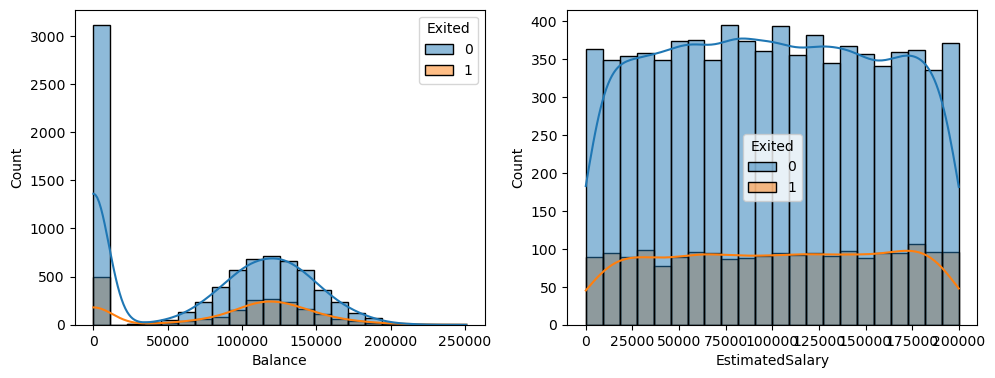

In [13]:
plt.figure(figsize=(18, 9))
for i, feature in enumerate(['Balance', 'EstimatedSalary']):
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(data=df, x=feature, ax=ax, color='blue', kde=True, hue='Exited')

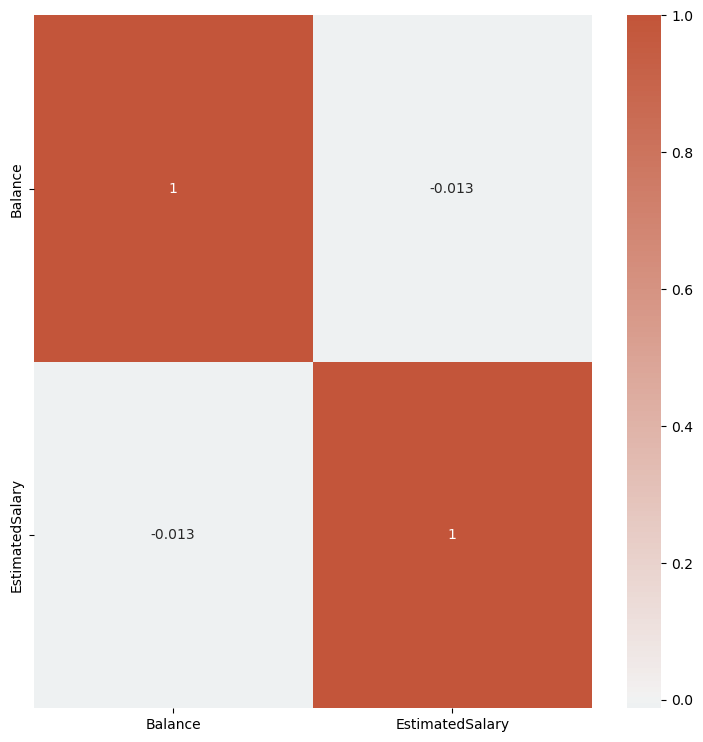

In [14]:
plt.figure(figsize=(9, 9))
sns.heatmap(df[df['Exited'] == 1][['Balance', 'EstimatedSalary']].corr(), annot=True, center=0, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

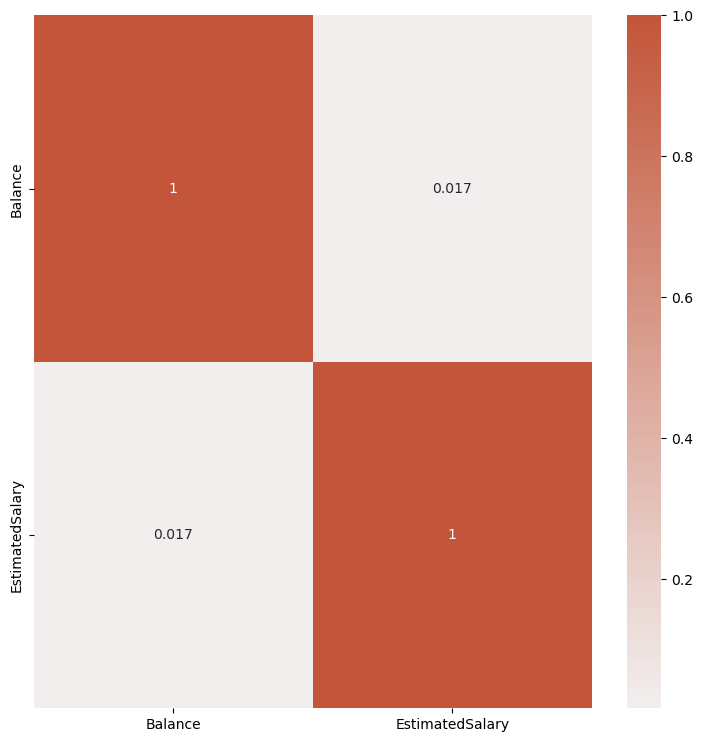

In [15]:
plt.figure(figsize=(9, 9))
sns.heatmap(df[df['Exited'] == 0][['Balance', 'EstimatedSalary']].corr(), annot=True, center=0, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

In [16]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
# df['Age'] = df['Age'].fillna(df['Age'].mean())
# df['Age'] = df['Age'].fillna(df['Age'].median())
df['Age'].max()

92

In [18]:
df = df[df['Age'] < 90]

In [19]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
cols = ['Geography']
data = df[cols]

encoder = OneHotEncoder(dtype='int')

encoded_data = encoder.fit_transform(data)

In [22]:
encoder.get_feature_names_out(cols)

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [23]:
vars_ = encoder.get_feature_names_out(cols)

In [24]:
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=vars_)

In [25]:
final_df = pd.concat([df.drop(cols, axis=1), encoded_df], axis=1)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop('Exited', axis=1)
y = df['Exited']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y)

In [28]:
train_x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1533,850,France,Female,37,3,212778.20,1,0,1,69372.88
8573,633,France,Female,26,8,124281.84,1,1,1,60116.57
9965,627,Germany,Female,33,4,83199.05,1,0,0,159334.93
5850,631,Germany,Female,22,6,139129.92,1,1,1,63747.51
2690,648,Spain,Male,42,2,98795.61,2,1,0,89123.99
...,...,...,...,...,...,...,...,...,...,...
4515,726,Spain,Male,30,8,134152.29,1,1,1,147822.44
5340,680,Spain,Male,42,0,0.00,1,1,0,136377.21
9623,573,France,Female,47,8,154543.98,1,1,0,29586.73
2989,703,Spain,Female,45,1,0.00,1,1,0,182784.11


In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [30]:
train_x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1533,850,France,Female,37,3,212778.20,1,0,1,69372.88
8573,633,France,Female,26,8,124281.84,1,1,1,60116.57
9965,627,Germany,Female,33,4,83199.05,1,0,0,159334.93
5850,631,Germany,Female,22,6,139129.92,1,1,1,63747.51
2690,648,Spain,Male,42,2,98795.61,2,1,0,89123.99


In [31]:
features = ['Balance', 'EstimatedSalary']

In [32]:
sc = MinMaxScaler()

In [33]:
train_x[features] = sc.fit_transform(train_x[features])
test_x[features] = sc.fit_transform(test_x[features])

In [34]:
train_x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1533,850,France,Female,37,3,0.848066,1,0,1,0.346840
8573,633,France,Female,26,8,0.495348,1,1,1,0.300554
9965,627,Germany,Female,33,4,0.331605,1,0,0,0.796693
5850,631,Germany,Female,22,6,0.554528,1,1,1,0.318710
2690,648,Spain,Male,42,2,0.393768,2,1,0,0.445605


In [37]:
from imblearn.over_sampling import RandomOverSampler

ModuleNotFoundError: No module named 'imblearn'

In [38]:
oversample = RandomOverSampler(sampling_strategy='minority')

NameError: name 'RandomOverSampler' is not defined

In [39]:
train_y.value_counts()

0    6368
1    1630
Name: Exited, dtype: int64

In [40]:
X_train, y_train = oversample.fit_resample(train_x, train_y)

NameError: name 'oversample' is not defined

In [ ]:
len(X_train)

In [ ]:
len(train_x)

In [ ]:
y_train.value_counts()